# Importando os Dados
Importando dados do Google Drive para o ambiente do Colab.

https://www.kaggle.com/datasets/kmkarakaya/logos-bk-kfc-mcdonald-starbucks-subway-none

In [32]:
# Montando o Google Drive no Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Definindo o caminho para os diretórios de treino e teste
train_dir = '/content/gdrive/My Drive/Colab Notebooks/cnn/train'
test_dir = '/content/gdrive/My Drive/Colab Notebooks/cnn/test'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Preparação dos Dados
A biblioteca keras.preprocessing será utilizada para preparar os dados.

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# Criando geradores de dados para treino e validação com normalização
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1393 images belonging to 6 classes.
Found 345 images belonging to 6 classes.


# Construção do Modelo
Criação de uma Rede Neural Convolucional básica usando Keras.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6 classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Treinamento do Modelo

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
43/43 [==============================] - 310s 7s/step - loss: 1.5185 - accuracy: 0.5320 - val_loss: 0.9327 - val_accuracy: 0.6844
Epoch 2/20
43/43 [==============================] - 91s 2s/step - loss: 0.6012 - accuracy: 0.8046 - val_loss: 0.7200 - val_accuracy: 0.7750
Epoch 3/20
43/43 [==============================] - 92s 2s/step - loss: 0.3975 - accuracy: 0.8633 - val_loss: 0.9668 - val_accuracy: 0.6531
Epoch 4/20
43/43 [==============================] - 89s 2s/step - loss: 0.2581 - accuracy: 0.9148 - val_loss: 0.6478 - val_accuracy: 0.7906
Epoch 5/20
43/43 [==============================] - 91s 2s/step - loss: 0.0943 - accuracy: 0.9728 - val_loss: 0.7327 - val_accuracy: 0.8094
Epoch 6/20
43/43 [==============================] - 90s 2s/step - loss: 0.0389 - accuracy: 0.9919 - val_loss: 0.8715 - val_accuracy: 0.7844
Epoch 7/20
43/43 [==============================] - 88s 2s/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 1.0185 - val_accuracy: 0.7750
Epoch 8/20
43/43 [=

# Avaliação do Modelo

Por que Acurácia e Loss são importantes?

**Acurácia**: É uma medida da proporção de previsões corretas feitas pelo modelo. Em outras palavras, é a porcentagem de casos em que o modelo fez a previsão correta. Uma alta acurácia, no entanto, não garante que o modelo seja perfeito, especialmente se o conjunto de dados não estiver equilibrado.

**Loss**: Representa quão bem as previsões do modelo correspondem aos verdadeiros valores. Em problemas de classificação, a "loss" frequentemente refere-se à "entropia cruzada" entre as previsões e os verdadeiros valores. A loss oferece uma visão mais granular do desempenho do modelo do que a acurácia: enquanto a acurácia nos diz apenas quando estamos certos, a loss nos diz quão "errados" estamos quando erramos.

Visualizar a acurácia e a loss ao longo do treinamento ajuda a identificar:

**Overfitting**: Se a acurácia de treinamento continuar aumentando (ou a perda de treinamento continuar diminuindo), mas a acurácia de validação começar a diminuir (ou a perda de validação começar a aumentar), isso é um indicativo de overfitting.

**Convergência**: Ajuda a entender se o modelo está convergindo (aprendendo) e, se sim, a velocidade de convergência.

Ao monitorar essas métricas e visualizá-las graficamente, podemos fazer ajustes no modelo ou no processo de treinamento para melhorar seu desempenho.

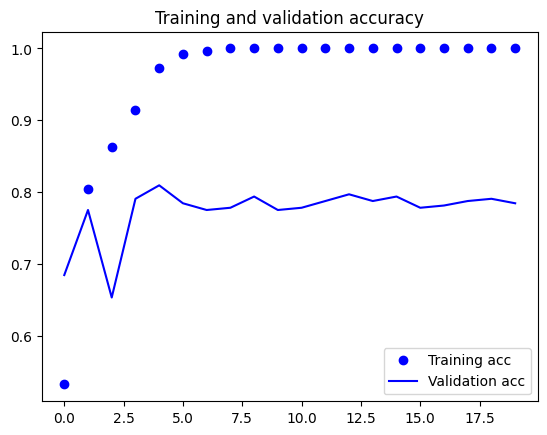

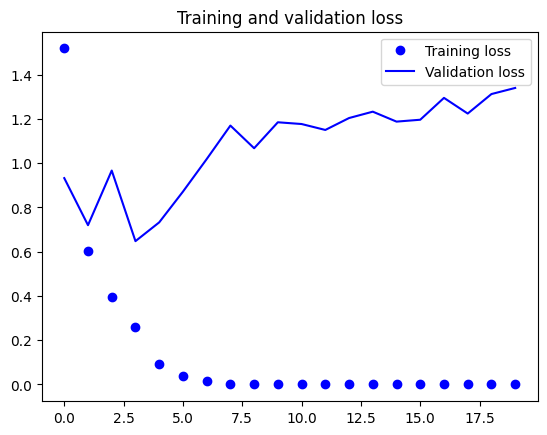

In [11]:
import matplotlib.pyplot as plt

# Plota os resultados do treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Analisando os resultados do treinamento baseado na precisão (accuracy) e perda (loss).

1. **Acurácia (acc) e Acurácia na Validação (val_acc)**:
   - **Acurácia de Treinamento (acc)**: Começa em 53% na primeira época e rapidamente melhora, atingindo 100% nas últimas épocas. Isso indica que o modelo foi capaz de aprender e se ajustar perfeitamente ao conjunto de treinamento.
   - **Acurácia de Validação (val_acc)**: Começa em 68% e flutua entre 65% e 81% ao longo das épocas. Não há um aumento significativo ou padrão claro de melhoria, e a acurácia parece estabilizar-se em torno de 78-80%.
   - A discrepância entre as acurácias de treinamento e validação sugere um caso de overfitting. Enquanto o modelo se ajusta perfeitamente aos dados de treinamento, ele não generaliza tão bem para o conjunto de validação.

2. **Perda (loss) e Perda na Validação (val_loss)**:
   - **Perda de Treinamento (loss)**: Diminui rapidamente nas primeiras épocas e eventualmente atinge valores muito baixos, quase zero nas últimas épocas.
   - **Perda de Validação (val_loss)**: Diminui inicialmente até a 4ª época, mas depois começa a aumentar consistentemente. Isso indica que, embora o modelo esteja se ajustando melhor aos dados de treinamento (reduzindo sua perda), ele está ficando pior em termos de generalização para os dados de validação.
   - A divergência crescente entre a perda de treinamento e a perda de validação é outro sinal de overfitting.

**Conclusões**:

- O modelo claramente sofre de overfitting. Enquanto se ajusta perfeitamente ao conjunto de treinamento, ele não generaliza bem para o conjunto de validação.
- Estratégias como regularização, dropout, obtenção de mais dados, ou até mesmo uma arquitetura de modelo mais simples podem ser consideradas para combater o overfitting.
- Também seria benéfico monitorar a acurácia e a perda de validação durante o treinamento e parar o treinamento (early stopping) quando a perda de validação começar a aumentar, mesmo que a perda de treinamento continue a diminuir. Essa abordagem pode evitar que o modelo se ajuste excessivamente aos dados de treinamento.
- Uma validação cruzada pode ser útil para obter uma avaliação mais robusta do desempenho do modelo.

# Treinamento do modelo v. 2

Adicionando a **regularização** L2 nas camadas Dense e Conv2D.

In [19]:
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(6, activation='softmax'))


Adicionado o **early stoping** para interromper o treinamento se uma métrica monitorada começar a piorar. Um EarlyStopping callback do Keras será usado para isso.

In [20]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5, verbose=1,
    restore_best_weights=True
  )

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stop]
)


Epoch 1/20
43/43 [==============================] - 97s 2s/step - loss: 4.4189 - accuracy: 0.5290 - val_loss: 2.0343 - val_accuracy: 0.6875
Epoch 2/20
43/43 [==============================] - 99s 2s/step - loss: 1.6729 - accuracy: 0.7068 - val_loss: 1.6282 - val_accuracy: 0.6875
Epoch 3/20
43/43 [==============================] - 95s 2s/step - loss: 1.4053 - accuracy: 0.7406 - val_loss: 1.4465 - val_accuracy: 0.7000
Epoch 4/20
43/43 [==============================] - 99s 2s/step - loss: 1.1861 - accuracy: 0.7994 - val_loss: 1.4695 - val_accuracy: 0.6656
Epoch 5/20
43/43 [==============================] - 93s 2s/step - loss: 1.0565 - accuracy: 0.8229 - val_loss: 1.3870 - val_accuracy: 0.7250
Epoch 6/20
43/43 [==============================] - 100s 2s/step - loss: 1.0160 - accuracy: 0.8384 - val_loss: 1.3103 - val_accuracy: 0.7031
Epoch 7/20
43/43 [==============================] - 102s 2s/step - loss: 0.9277 - accuracy: 0.8420 - val_loss: 1.2260 - val_accuracy: 0.7156
Epoch 8/20
43/43 [

Na configuração acima:

- `monitor='val_loss'`: Isso significa que o modelo está monitorando a 'val_loss' durante o treinamento.
- `patience=5`: Isso indica que o treinamento será interrompido se a 'val_loss' não melhorar após 5 épocas consecutivas.
-`restore_best_weights=True`: Isso garante que, ao final do treinamento, os pesos do modelo serão aqueles da época com a menor 'val_loss'.


# Avaliação do modelo v. 2

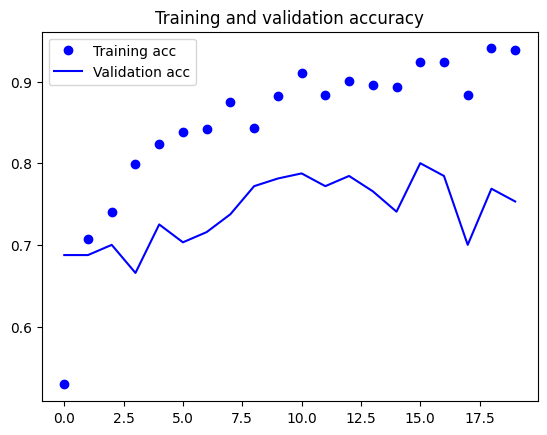

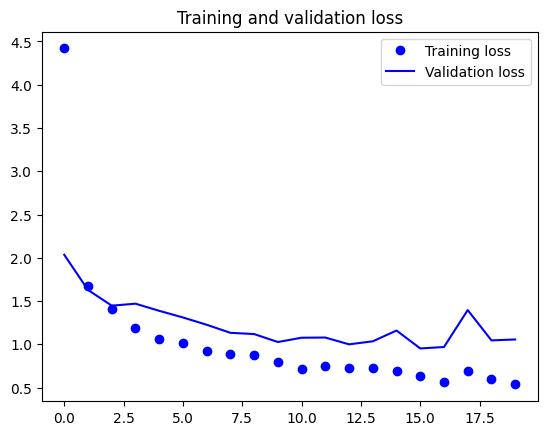

In [21]:
import matplotlib.pyplot as plt

# Plota os resultados do treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Analisando os resultados do treinamento baseado na precisão (accuracy) e perda (loss).

1. **Acurácia (acc) e Acurácia na Validação (val_acc)**:
    - **Acurácia de Treinamento (acc)**: Começa em cerca de 52.9% e aumenta até atingir 93.8%. Isso indica que o modelo está aprendendo e melhorando sua capacidade de classificação nas imagens de treino.
    - **Acurácia de Validação (val_acc)**: Inicia em 68.75%, e flutua durante o treinamento, atingindo um pico de 80%. Há uma discrepância notável entre as acurácias de treinamento e validação, o que pode indicar um overfitting. Embora a diferença não seja tão significativa quanto nos resultados anteriores, ainda é algo a se observar.

2. **Perda (loss) e Perda na Validação (val_loss)**:
    - **Perda de Treinamento (loss)**: Começa em 4.42 e diminui consistentemente até 0.53. Isso indica que o modelo está reduzindo seu erro nas imagens de treino à medida que avança nas épocas.
    - **Perda de Validação (val_loss)**: Inicia em 2.03 e mostra um declínio geral até cerca de 0.95, mas com algumas flutuações ao longo do caminho. Há um aumento perceptível na perda de validação nas últimas épocas, o que pode ser um sinal de que o modelo está começando a se ajustar demais aos dados de treinamento e perdendo sua capacidade de generalização.

**Conclusões**:

- Ainda existe uma discrepância entre os resultados de treinamento e validação, embora pareça menos pronunciada do que nos resultados anteriores. Isso pode indicar que as técnicas de regularização e parada precoce ajudaram, mas talvez sejam necessários ajustes adicionais.
- O modelo alcançou uma acurácia de validação de 80%, que é um bom resultado. No entanto, dado que a acurácia de treinamento atinge 93.8%, isso sugere que o modelo tem potencial para um desempenho ainda melhor na validação com mais ajustes e otimizações.
- A perda de validação mostra alguma inconsistência. Embora haja uma tendência decrescente geral, há flutuações, e o aumento nas últimas épocas sugere que o modelo pode estar começando sofrer overfit.

**Próximos passos**:

- Adição de camadas de `Dropout` na tentativa de prevenir overfitting ao desligar aleatoriamente neurônios durante o treinamento.

# Treinamento do modelo v. 3

In [34]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))


In [35]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
  )

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stop]
)


Epoch 1/20
43/43 [==============================] - 101s 2s/step - loss: 10.5709 - accuracy: 0.4298 - val_loss: 6.1441 - val_accuracy: 0.4906
Epoch 2/20
43/43 [==============================] - 99s 2s/step - loss: 4.5241 - accuracy: 0.4974 - val_loss: 3.4527 - val_accuracy: 0.5781
Epoch 3/20
43/43 [==============================] - 96s 2s/step - loss: 2.7916 - accuracy: 0.6106 - val_loss: 2.5033 - val_accuracy: 0.6281
Epoch 4/20
43/43 [==============================] - 95s 2s/step - loss: 2.1396 - accuracy: 0.6561 - val_loss: 2.0649 - val_accuracy: 0.6625
Epoch 5/20
43/43 [==============================] - 103s 2s/step - loss: 1.7923 - accuracy: 0.6995 - val_loss: 1.8772 - val_accuracy: 0.6531
Epoch 6/20
43/43 [==============================] - 102s 2s/step - loss: 1.5873 - accuracy: 0.7223 - val_loss: 1.6378 - val_accuracy: 0.7063
Epoch 7/20
43/43 [==============================] - 103s 2s/step - loss: 1.4568 - accuracy: 0.7215 - val_loss: 1.5737 - val_accuracy: 0.6969
Epoch 8/20
43/4

# Avaliação do modelo v. 3

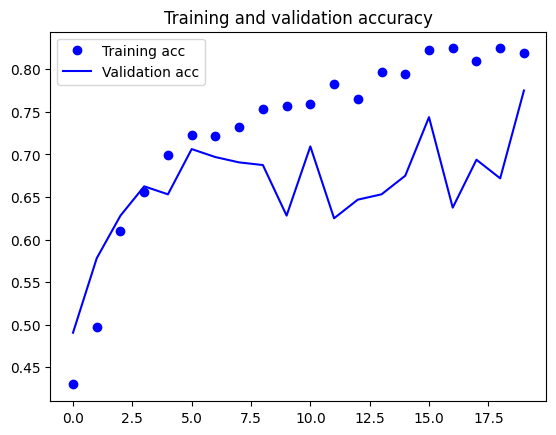

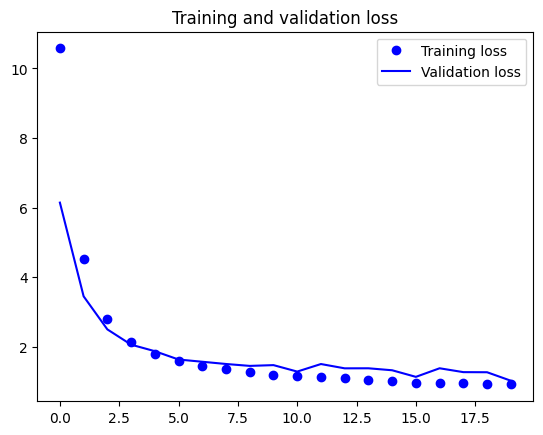

In [36]:
import matplotlib.pyplot as plt

# Plota os resultados do treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Analisando os resultados do treinamento baseado na precisão (accuracy) e perda (loss).

1. **Acurácia (acc) e Acurácia na Validação (val_acc)**:
    - **Acurácia de Treinamento (acc)**: O modelo começa com uma acurácia de aproximadamente 43% e melhora ao longo do tempo para atingir cerca de 82% após 20 épocas.
    - **Acurácia de Validação (val_acc)**: Começa em cerca de 49% e tem algumas flutuações ao longo das épocas. Atinge o seu melhor valor de 77,5% na 20ª época.

2. **Perda (loss) e Perda na Validação (val_loss)**:
    - **Perda de Treinamento (loss)**: Começa com um valor alto de 10,57 e diminui de forma consistente para aproximadamente 0,924 após 20 épocas.
    - **Perda de Validação (val_loss)**: Começa em 6,14 e também diminui ao longo das épocas, com algumas pequenas flutuações. Atinge seu valor mais baixo de 1,029 na 20ª época.

**Conclusões**:
- Não parece haver um overfitting grave, o que é uma boa notícia. As métricas de treinamento e validação estão se movendo em paralelo. O dropout, a regularização L2 e early stop estão ajudando nisso.
- O modelo parece ainda estar melhorando após 20 épocas, principalmente ao olhar para a perda de validação que atinge seu valor mais baixo na última época. Isso sugere que mais épocas poderiam ser benéficas.
- Embora haja espaço para melhoria, o modelo tem um desempenho bom considerando que começou com valores mais baixos de acurácia e perda.
